In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import math
import folium

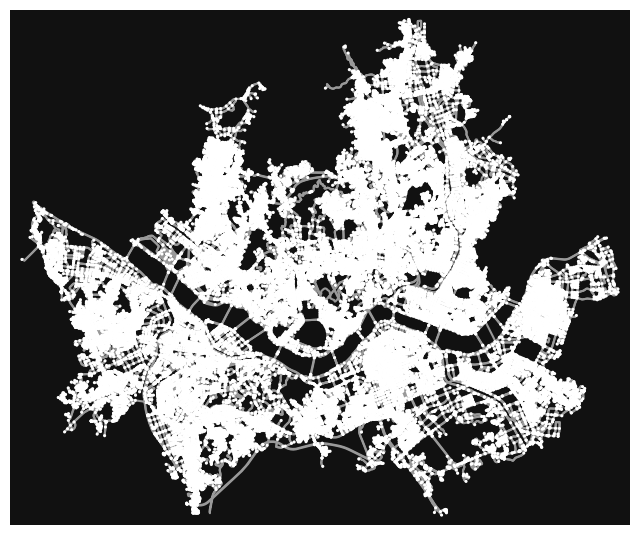

In [3]:
# 서울의 도로 네트워크 데이터 가져오기
place_name = "Seoul, South Korea"
graph = ox.graph_from_place(place_name, network_type='drive')

# 그래프 시각화
fig, ax = ox.plot_graph(graph, node_size=5, edge_linewidth=1.5)

In [4]:
# 강남역과 서울역의 좌표
start_lat, start_lon = 37.57758, 127.07425  # 동대부고
end_lat, end_lon = 37.57554, 126.97664      # 경복궁

# 시작점과 끝점 노드 찾기
start_node = ox.distance.nearest_nodes(graph, X=start_lon, Y=start_lat)
end_node = ox.distance.nearest_nodes(graph, X=end_lon, Y=end_lat)

# 유클리드 거리 계산 함수
def euclidean_distance(node1, node2):
    x1, y1 = graph.nodes[node1]['x'], graph.nodes[node1]['y']
    x2, y2 = graph.nodes[node2]['x'], graph.nodes[node2]['y']
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# A* 알고리즘을 사용한 최단 경로 찾기
shortest_path_astar = nx.astar_path(graph, start_node, end_node, heuristic=euclidean_distance, weight='length')

# 지도 생성
m = folium.Map(location=[(start_lat + end_lat) / 2, (start_lon + end_lon) / 2], zoom_start=13)

# A* 경로 표시
astar_route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in shortest_path_astar]
folium.PolyLine(astar_route_coords, color="blue", weight=2.5, opacity=1).add_to(m)

# 시작점과 끝점 표시
folium.Marker(location=[start_lat, start_lon], popup="Gangnam Station", icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=[end_lat, end_lon], popup="Seoul Station", icon=folium.Icon(color='red')).add_to(m)

# 지도 저장 및 출력
m.save('seoul_route.html')

length_meter = int(nx.astar_path_length(graph, start_node, end_node, heuristic=euclidean_distance, weight='length'))

print('최단거리는',length_meter,'m 이다.')

최단거리는 10158 m 이다.
